In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  
from sklearn.inspection import partial_dependence
from sklearn.feature_selection import SelectFromModel




In [2]:
diabetes = datasets.load_diabetes(as_frame=True)

y = diabetes.target
X = diabetes.data
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=13)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, y_val


((309, 10),
 (133, 10),
 (309,),
 (133,),
 135    272.0
 358     90.0
 194     86.0
 399    232.0
 405    281.0
        ...  
 54     182.0
 421    212.0
 168    268.0
 109     81.0
 136     85.0
 Name: target, Length: 133, dtype: float64)

In [4]:


pipeline = Pipeline([
    # handle missing values
    ("imputer", SimpleImputer()),
    # transform the input
    ("scaler", StandardScaler()),
    # select best features
    ("select", SelectKBest()),
    # fit to transformed outputs
    ("model", TransformedTargetRegressor()),
])




In [5]:


pipeline_grid = GridSearchCV(pipeline, [
    
    
    {
        "scaler": ["passthrough", StandardScaler(), MinMaxScaler()],
        "select__k": [4, 6, 8, 10],
        "model__regressor": [LinearRegression()],
        "model__transformer": ["passthrough", StandardScaler(), MinMaxScaler()]
       
    },
    {
        "scaler": ["passthrough", StandardScaler(), MinMaxScaler()],
        "model__regressor": [SVR()],
        "model__regressor__kernel": ["linear", "rbf", "sigmoid"],
        "model__transformer": ["passthrough", StandardScaler(), MinMaxScaler()]
    },
    {
        "scaler": [MinMaxScaler((-1, 1))],
        "select__k": [4, 6, 8, 10],
        "model__regressor": [MLPRegressor()],
        "model__regressor__hidden_layer_sizes": [(30, ), (10, 10, 10), (10, 20, 10)],
        "model__regressor__activation": ["relu", "tanh"],
        "model__regressor__solver": ["adam"],
        "model__regressor__max_iter": [1000],
        "model__transformer": [MinMaxScaler((-1, 1))]
    },
    {
        "scaler": [StandardScaler(), MinMaxScaler()],
        "select__k": [4, 6, 8, 10],
        "model__regressor": [GradientBoostingRegressor()],
        "model__regressor__n_estimators": [50, 100, 150, 200],
        "model__regressor__max_depth": [3, 6, 9, 12],
        "model__transformer": [StandardScaler(), MinMaxScaler()]
    },
], scoring="r2",cv=5)  # scoring = "neg_mean_squared_error"



In [10]:
pipeline_grid.fit(X_train, y_train)

/root/.local/share/virtualenvs/machine-learning-3gRytY6Y/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 1715.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/root/.local/share/virtualenvs/machine-learning-3gRytY6Y/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/.local/share/virtualenvs/machine-learning-3gRytY6Y/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/root/.local/share/vi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('select', SelectKBest()),
                                       ('model',
                                        TransformedTargetRegressor())]),
             param_grid=[{'model__regressor': [LinearRegression()],
                          'model__transformer': ['passthrough',
                                                 StandardScaler(),
                                                 MinMaxScaler()],
                          'scaler': ['passthrough', StandardScaler(),
                                     MinMaxScaler()],
                          'sele...
                                                                             1))],
                          'scaler': [MinMaxScaler(feature_range=(-1, 1))],
                          'select__k': [4, 6, 8, 10]},
                         {'model__regressor': [GradientBoostingRegressor()],
                          'model__regressor__max_depth': [3, 6, 9, 12],
                          'model__regressor__n_estimators': [50, 100, 150, 200],
                          'model__transformer': [StandardScaler(),
                                                 MinMaxScaler()],
                          'scaler': [StandardScaler(), MinMaxScaler()],
                          'select__k': [4, 6, 8, 10]}],
             scoring='r2')

In [11]:

pipeline_grid.best_estimator_


Pipeline(steps=[('imputer', SimpleImputer()),
                ('scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('select', SelectKBest(k=8)),
                ('model',
                 TransformedTargetRegressor(regressor=MLPRegressor(activation='tanh',
                                                                   hidden_layer_sizes=(30,),
                                                                   max_iter=1000),
                                            transformer=MinMaxScaler(feature_range=(-1,
                                                                                    1))))])

PDP for 2 features

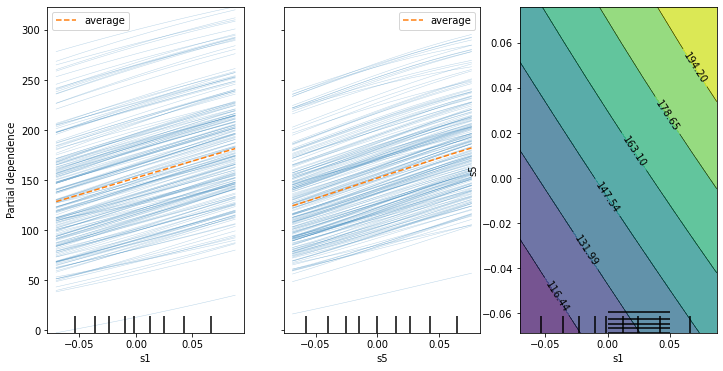

In [27]:

features = [3, 2, (3, 2)]
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(12, 6))
display = plot_partial_dependence(
    pipeline_grid.best_estimator_,
    X_train,
    features=["s1", "s5", ("s1", "s5")],
    kind=["both", "both", "average"],
    ax=ax,
  
    subsample=200,
    grid_resolution=10,
    n_jobs=-1,
    random_state=43,

)




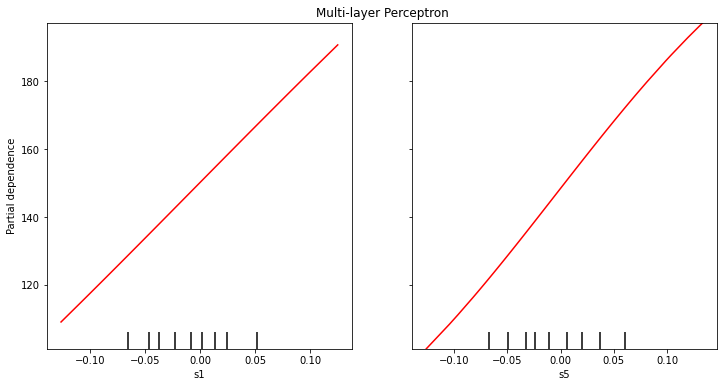

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    pipeline_grid.best_estimator_, X_val, ["s1", "s5"], ax=ax, line_kw={"color": "red"},random_state=43,
)

In [15]:

pipeline_grid.best_params_

{'model__regressor': MLPRegressor(activation='tanh', hidden_layer_sizes=(30,), max_iter=1000),
 'model__regressor__activation': 'tanh',
 'model__regressor__hidden_layer_sizes': (30,),
 'model__regressor__max_iter': 1000,
 'model__regressor__solver': 'adam',
 'model__transformer': MinMaxScaler(feature_range=(-1, 1)),
 'scaler': MinMaxScaler(feature_range=(-1, 1)),
 'select__k': 8}

In [16]:
pipeline6 = Pipeline([ 
    ("imputer", SimpleImputer()),
    ("scaler",MinMaxScaler(feature_range=(-1, 1))),
    ("select", SelectKBest()),
 
    ("model", (TransformedTargetRegressor(regressor=MLPRegressor(activation='tanh',
                                                  hidden_layer_sizes=(30,),
                                                  max_iter=1000),
                           transformer=MinMaxScaler(feature_range=(-1, 1)))))]) 

v=pipeline6.fit(X_train, y_train)


/root/.local/share/virtualenvs/machine-learning-3gRytY6Y/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


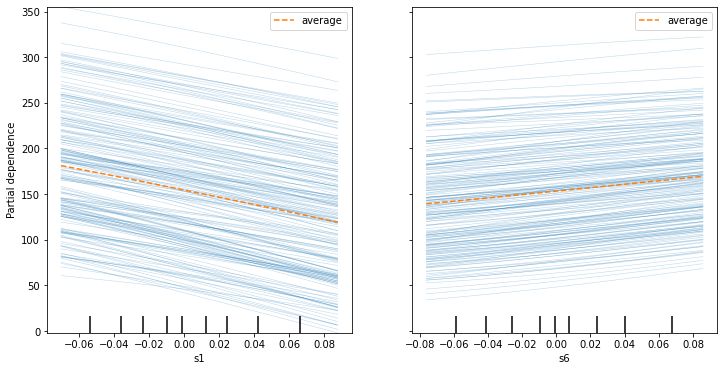

In [17]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(12, 6))
display = plot_partial_dependence(
    pipeline6,
    X_train,
    [4,9],
    kind="both",
    ax=ax,
    subsample=200,
    grid_resolution=20,
    n_jobs=-1,
    random_state=43,
)

In [18]:


pipeline3 = Pipeline([('scaler', StandardScaler()),
('rfr',RandomForestRegressor(max_depth=12,n_estimators=100))]) 
clf=pipeline3.fit(X_train, y_train)



/root/.local/share/virtualenvs/machine-learning-3gRytY6Y/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


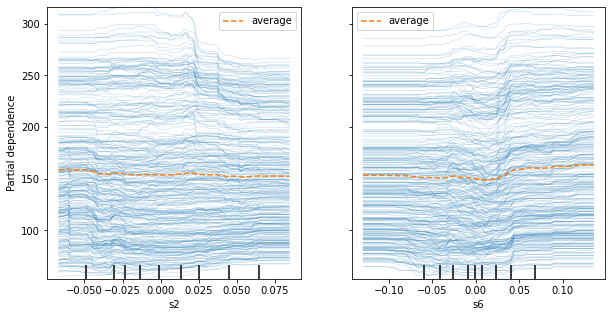

In [19]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(10,5))
plot_partial_dependence(pipeline3, X_train, [5,9], kind ='both', ax=ax)

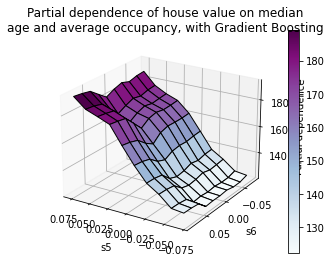

In [20]:


fig = plt.figure()

features = ("s5", "s6")
pdp = partial_dependence(
    clf, X_train, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel("Partial dependence")
# pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle(
    "Partial dependence of house value on median\n"
    "age and average occupancy, with Gradient Boosting"
)
plt.subplots_adjust(top=0.9)
plt.show()